+ V3

In [3]:
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)    
    #print("Peso = ",new_load)
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*3.14*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return [air_pressure, temp_air]

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69 ) * persons_newton
    new_load = new_persons_newton + load
    return new_load


diameter = 15
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
people = range(6)  # De 0 a 5


air_pressure, temp_air = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, 0)
print(air_pressure, " --- ", temp_air)

1.072904456434463  ---  329.36390363626526



+ Busca Linear

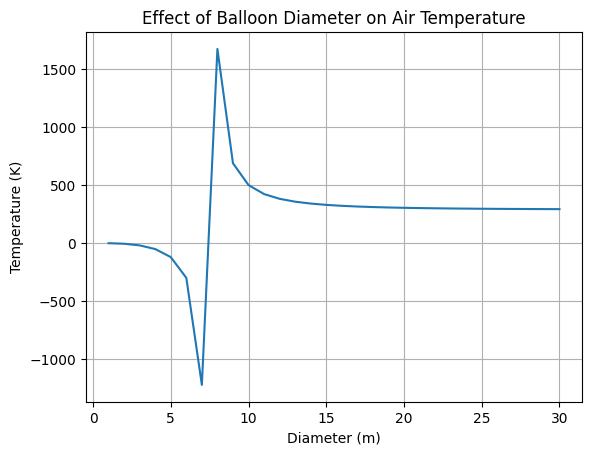

Optimal Balloon Diameter: 7 m


In [4]:
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)    
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*3.14*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return [air_pressure, temp_air]

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69 ) * persons_newton
    new_load = new_persons_newton + load
    return new_load

def optimize_balloon_diameter(load, temperature, gravity, atmosphere_pressure, max_diameter, step_size):
    diameters = []
    temperatures = []
    
    for diameter in range(1, max_diameter + 1, step_size):
        air_pressure, temp_air = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, 0)
        diameters.append(diameter)
        temperatures.append(temp_air)
    
    plt.plot(diameters, temperatures)
    plt.xlabel('Diameter (m)')
    plt.ylabel('Temperature (K)')
    plt.title('Effect of Balloon Diameter on Air Temperature')
    plt.grid(True)
    plt.show()

    min_temp = min(temperatures)
    min_index = temperatures.index(min_temp)
    optimal_diameter = diameters[min_index]
    return optimal_diameter

diameter = 15
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
max_diameter = 30  # You can adjust this according to your requirements
step_size = 1  # You can adjust this according to your requirements

optimal_diameter = optimize_balloon_diameter(load, temperature, gravity, atmosphere_pressure, max_diameter, step_size)
print("Optimal Balloon Diameter:", optimal_diameter, "m")


O diâmetro otimizado é: 289
A temperatura mínima correspondente é: 288.00505738340735


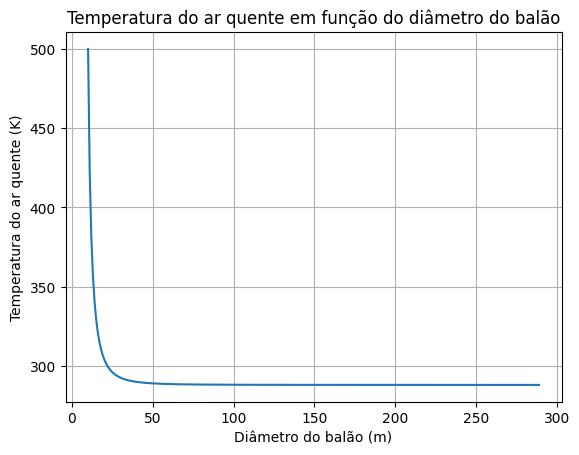

In [8]:
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)    
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*3.14*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return [air_pressure, temp_air]

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69) * persons_newton
    new_load = new_persons_newton + load
    return new_load

# Parâmetros iniciais
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
people = 0  # Número de pessoas

# Faixa de diâmetros para testar
diameters = range(10, 290)
temperatures = []

# Iterar sobre diferentes diâmetros
for diameter in diameters:
    air_pressure, temp_air = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)
    temperatures.append(temp_air)

# Encontrar o diâmetro que minimiza ou maximiza a temperatura (dependendo do critério)
optimized_diameter = diameters[temperatures.index(min(temperatures))]  # No caso, estamos minimizando a temperatura

print("O diâmetro otimizado é:", optimized_diameter)
print("A temperatura mínima correspondente é:", min(temperatures))

# Plotagem para visualização
plt.plot(diameters, temperatures)
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Temperatura do ar quente (K)')
plt.title('Temperatura do ar quente em função do diâmetro do balão')
plt.grid(True)
plt.show()


+ Metodo do Gradiente Descendente

Diâmetro otimizado: 29.02855917604029
Temperatura mínima correspondente: 293.0757772338389


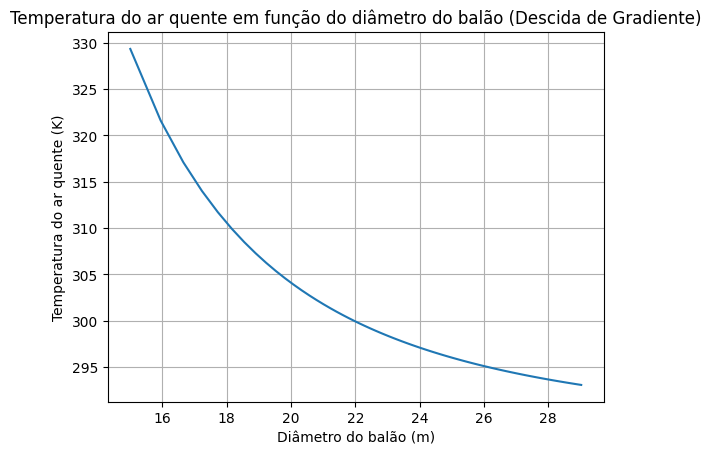

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*np.pi*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return temp_air

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69) * persons_newton
    new_load = new_persons_newton + load
    return new_load

# Função para calcular o gradiente da temperatura em relação ao diâmetro
def gradient(diameter, load, temperature, gravity, atmosphere_pressure, people):
    h = 1e-5  # Passo de diferenciação
    grad = (activity_2(diameter + h, load, temperature, gravity, atmosphere_pressure, people) - activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)) / h
    return grad

# Parâmetros iniciais
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
people = 0  # Número de pessoas

# Taxa de aprendizado (tamanho do passo)
learning_rate = 0.1

# Número de iterações
num_iterations = 100

# Diâmetro inicial
diameter = 15

# Lista para armazenar os valores do diâmetro e temperatura do ar quente em cada iteração
diameter_history = [diameter]
temperature_history = [activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)]

# Gradiente descendente
for i in range(num_iterations):
    grad = gradient(diameter, load, temperature, gravity, atmosphere_pressure, people)
    diameter -= learning_rate * grad
    temp = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)
    diameter_history.append(diameter)
    temperature_history.append(temp)

# Resultados
print("Diâmetro otimizado:", diameter)
print("Temperatura mínima correspondente:", temperature_history[-1])

# Plotagem para visualização
plt.plot(diameter_history, temperature_history)
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Temperatura do ar quente (K)')
plt.title('Temperatura do ar quente em função do diâmetro do balão (Descida de Gradiente)')
plt.grid(True)
plt.show()


Diâmetro otimizado: 15.296221956013198
Pressão máxima correspondente: 1.081758374341002


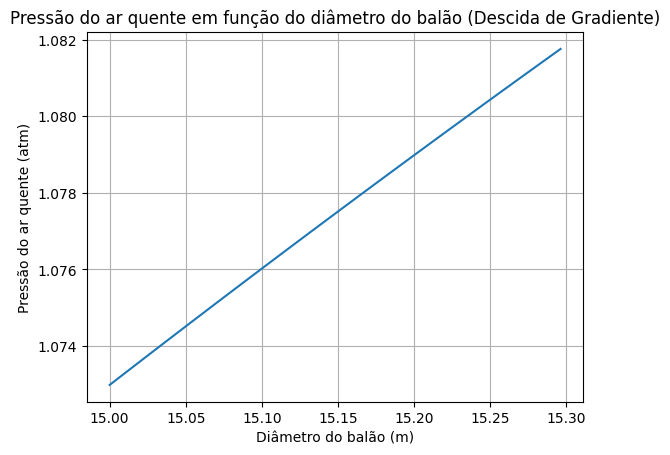

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*np.pi*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return air_pressure

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69) * persons_newton
    new_load = new_persons_newton + load
    return new_load

# Função para calcular o gradiente da pressão do ar quente em relação ao diâmetro
def gradient(diameter, load, temperature, gravity, atmosphere_pressure, people):
    h = 1e-5  # Passo de diferenciação
    grad = (activity_2(diameter + h, load, temperature, gravity, atmosphere_pressure, people) - activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)) / h
    return grad

# Parâmetros iniciais
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
people = 0  # Número de pessoas

# Taxa de aprendizado (tamanho do passo)
learning_rate = 0.1

# Número de iterações
num_iterations = 100

# Diâmetro inicial
diameter = 15

# Lista para armazenar os valores do diâmetro e pressão do ar quente em cada iteração
diameter_history = [diameter]
pressure_history = [activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)]

# Gradiente descendente
for i in range(num_iterations):
    grad = gradient(diameter, load, temperature, gravity, atmosphere_pressure, people)
    diameter += learning_rate * grad  # Note que agora estamos aumentando o diâmetro para maximizar a pressão
    press = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)
    diameter_history.append(diameter)
    pressure_history.append(press)

# Resultados
print("Diâmetro otimizado:", diameter)
print("Pressão máxima correspondente:", pressure_history[-1])

# Plotagem para visualização
plt.plot(diameter_history, pressure_history)
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Pressão do ar quente (atm)')
plt.title('Pressão do ar quente em função do diâmetro do balão (Descida de Gradiente)')
plt.grid(True)
plt.show()


Diâmetro otimizado: 33.50781206141792
Pressão máxima correspondente: 1.1991767267577524
Temperatura mínima correspondente: 294.6821699545759


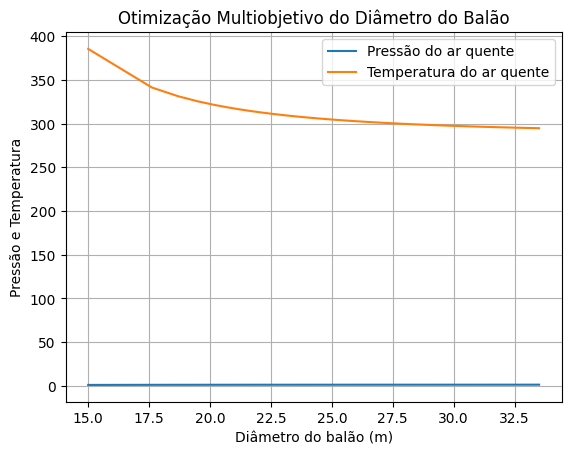

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*np.pi*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return air_pressure, temp_air

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69) * persons_newton
    new_load = new_persons_newton + load
    return new_load

# Função para calcular o gradiente da pressão do ar quente em relação ao diâmetro
def gradient_pressure(diameter, load, temperature, gravity, atmosphere_pressure, people):
    h = 1e-5  # Passo de diferenciação
    grad = (activity_2(diameter + h, load, temperature, gravity, atmosphere_pressure, people)[0] - activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[0]) / h
    return grad

# Função para calcular o gradiente da temperatura do ar quente em relação ao diâmetro
def gradient_temperature(diameter, load, temperature, gravity, atmosphere_pressure, people):
    h = 1e-5  # Passo de diferenciação
    grad = (activity_2(diameter + h, load, temperature, gravity, atmosphere_pressure, people)[1] - activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[1]) / h
    return grad

# Parâmetros iniciais
load = 2670
temperature = 288
gravity = 9.81 
atmosphere_pressure = 1.227
people = 4  # Número de pessoas

# Taxa de aprendizado (tamanho do passo)
learning_rate = 0.1

# Número de iterações
num_iterations = 100

# Diâmetro inicial
diameter = 15

# Lista para armazenar os valores do diâmetro, pressão do ar quente e temperatura do ar quente em cada iteração
diameter_history = [diameter]
pressure_history = [activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[0]]
temperature_history = [activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[1]]

# Gradiente descendente
for i in range(num_iterations):
    grad_pressure = gradient_pressure(diameter, load, temperature, gravity, atmosphere_pressure, people)
    grad_temperature = gradient_temperature(diameter, load, temperature, gravity, atmosphere_pressure, people)
    # Atualização do diâmetro
    diameter += learning_rate * grad_pressure - learning_rate * grad_temperature  # Combinação dos gradientes
    # Atualização dos históricos
    pressure = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[0]
    temp = activity_2(diameter, load, temperature, gravity, atmosphere_pressure, people)[1]
    diameter_history.append(diameter)
    pressure_history.append(pressure)
    temperature_history.append(temp)

# Resultados
print("Diâmetro otimizado:", diameter)
print("Pressão máxima correspondente:", pressure_history[-1])
print("Temperatura mínima correspondente:", temperature_history[-1])

# Plotagem para visualização
plt.plot(diameter_history, pressure_history, label='Pressão do ar quente')
plt.plot(diameter_history, temperature_history, label='Temperatura do ar quente')
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Pressão e Temperatura')
plt.title('Otimização Multiobjetivo do Diâmetro do Balão')
plt.legend()
plt.grid(True)
plt.show()
